# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**TEAM_ES5**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

<a id="cont"></a>

## TEAM MEMBERS

<a>1. Kennedy Ombedho</a>

<a>2. Jame Beta</a>

<a>3. Joseph Mugo</a>

<a>4. Ashafa Basheer</a> 

<a>5. Moses</a>


### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
---

In [6]:
#Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.graphics.correlation import plot_corr
%matplotlib inline

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr

#Libraries for Model Performance
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

#Library for creating pickle files of the models
import pickle as pkl
# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

In [2]:
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [9]:
# loading the two dataset
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'df_train.csv'

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


In [10]:
# A snippet of the data
df_train.head(2)

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0                0.0                1.0  ...       265.938000      281.013000   
1                0.0                1.0  ...       266.386667      280.561667   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   

   Seville_temp_min Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667  265.938000       265.938000        6715.666667  
1        274.945000  266.386667       266.386667        4171.666667  

[2 rows x 49 columns]

In [11]:

df_train.shape

(8763, 49)

In [14]:
#Checking data type for each column.
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

This shows that there are 46 columns of numerical types and 3 columns of Catergorical types and valencia_pressure has some missing values. The target variable is Numerical and float type

Key take-away:

- categorical variables: 3 columns of Catergorical types(Seville_pressure,Valencia_wind_deg and time)
- numerical variables: 46 columns of numerical types
- missing data: valencia_pressure has some missing values

In [7]:
#missing training_data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_training_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_training_data.head()

Total   Percent
Valencia_pressure      2068  0.235992
load_shortfall_3h         0  0.000000
Barcelona_wind_speed      0  0.000000
Seville_rain_3h           0  0.000000
Barcelona_pressure        0  0.000000

In [8]:
numbers = ['int64', 'float64']
df_num = df_train.select_dtypes(include=numbers)# select numerical feature
df_cat= df_train.select_dtypes(include='object')# select catergorical features

In [9]:
#Drop the index column
df_train.drop(df_num.columns[df_num.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)

In [10]:
df_num.describe()

Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
count  8763.000000        8763.000000     8763.000000          8763.000000   
mean   4381.000000           2.425729        0.135753             2.586272   
std    2529.804538           1.850371        0.374901             2.411190   
min       0.000000           0.000000        0.000000             0.000000   
25%    2190.500000           1.000000        0.000000             1.000000   
50%    4381.000000           2.000000        0.000000             1.666667   
75%    6571.500000           3.333333        0.100000             3.666667   
max    8762.000000          13.000000        3.000000            52.000000   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
count       8763.000000      8763.000000        8763.000000   
mean          62.658793        57.414717          43.469132   
std           22.621226        24.335396          32.551044   
min            8.333333         6.333333           0.000000   
25%           44.333333        36.333333          10.000000   
50%           65.666667        58.000000          45.000000   
75%           82.000000        78.666667          75.000000   
max          100.000000       100.000000         100.000000   

       Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  ...  \
count        8763.000000         8763.000000      8763.000000  ...   
mean            1.850356           13.714748       158.957511  ...   
std             1.695888           24.272482       102.056299  ...   
min             0.000000            0.000000         0.000000  ...   
25%             0.666667            0.000000        73.333333  ...   
50%             1.000000            0.000000       147.000000  ...   
75%             2.666667           20.000000       234.000000  ...   
max            12.666667           97.333333       359.333333  ...   

       Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
count      8763.000000     8763.000000      8763.000000  8763.000000   
mean        289.540309      289.855459       285.017973   286.422929   
std           9.752047        6.528111         6.705672     6.818682   
min         264.983333      270.816667       264.483333   267.483333   
25%         282.150000      284.973443       280.085167   281.374167   
50%         288.116177      289.416667       284.816667   286.158333   
75%         296.816667      294.909000       289.816667   291.034167   
max         314.483333      307.316667       309.816667   310.710000   

       Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  \
count         8763.000000      8763.000000       8763.000000  8763.000000   
mean           288.447422       287.966027        291.633356   288.419439   
std              6.102593         7.105590          8.178220     9.346796   
min            269.483333       269.063000        270.150000   264.983333   
25%            284.150000       282.836776        285.816667   281.404281   
50%            288.150000       287.630000        290.816667   287.053333   
75%            292.966667       292.483333        297.150000   295.154667   
max            304.816667       317.966667        314.816667   313.133333   

       Madrid_temp_min  load_shortfall_3h  
count      8763.000000        8763.000000  
mean        287.202203       10673.857612  
std           9.206237        5218.046404  
min         264.983333       -6618.000000  
25%         280.299167        7390.333333  
50%         286.083333       11114.666667  
75%         293.884500       14498.166667  
max         310.383333       31904.000000  

[8 rows x 46 columns]

In [11]:
df_test.head(2)

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0        8763  2018-01-01 00:00:00           5.000000           level_8   
1        8764  2018-01-01 03:00:00           4.666667           level_8   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             5.000000              87.0        71.333333   
1             0.0             5.333333              89.0        78.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Barcelona_temp_max  \
0               20.0           3.000000  ...          287.816667   
1                0.0           3.666667  ...          284.816667   

   Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
0       280.816667      287.356667       276.150000       280.38   
1       280.483333      284.190000       277.816667       281.01   

   Barcelona_temp_min  Bilbao_temp_max Seville_temp_min  Madrid_temp  \
0          286.816667           285.15           283.15   279.866667   
1          283.483333           284.15           281.15   279.193333   

   Madrid_temp_min  
0           279.15  
1           278.15  

[2 rows x 48 columns]

In [12]:
df_test.shape

(2920, 48)

<Figure size 1200x480 with 0 Axes>

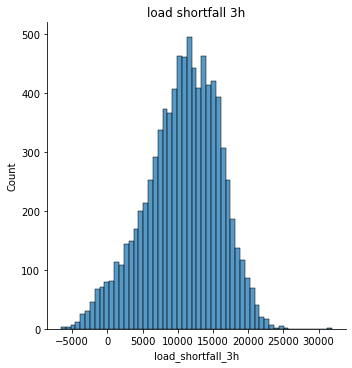

In [17]:
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=80)
sns.displot(df_train['load_shortfall_3h'])
plt.title('load shortfall 3h')
plt.show()

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

In [14]:
df_test.isnull().sum().sort_values(ascending=False).head()

Valencia_pressure     454
Madrid_temp_min         0
Madrid_rain_1h          0
Barcelona_pressure      0
Bilbao_snow_3h          0
dtype: int64

In [15]:
#missing test_data
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_test_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_test_data.head()

Total   Percent
Valencia_pressure     454  0.155479
Madrid_temp_min         0  0.000000
Madrid_rain_1h          0  0.000000
Barcelona_pressure      0  0.000000
Bilbao_snow_3h          0  0.000000

In [16]:
numbers = ['int64', 'float64']
df_num_test = df_test.select_dtypes(include=numbers)# select numerical feature
df_cat_test= df_test.select_dtypes(include='object')# select catergorical feature

In [17]:
#Drop the index column
df_test.drop(df_num_test.columns[df_num_test.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)

In [18]:
df_num_test.describe()

Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
count   2920.000000        2920.000000     2920.000000          2920.000000   
mean   10222.500000           2.457820        0.067517             3.012785   
std      843.075718           1.774838        0.153381             1.996340   
min     8763.000000           0.000000        0.000000             0.000000   
25%     9492.750000           1.333333        0.000000             1.666667   
50%    10222.500000           2.000000        0.000000             2.333333   
75%    10952.250000           3.333333        0.000000             4.000000   
max    11682.000000          13.333333        1.600000            14.333333   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
count       2920.000000      2920.000000        2920.000000   
mean          67.123516        62.644463          43.355422   
std           20.611292        24.138393          30.486298   
min           11.666667         8.000000           0.000000   
25%           52.000000        43.000000          13.333333   
50%           70.333333        63.000000          45.000000   
75%           85.000000        84.000000          75.000000   
max          100.000000       100.000000          97.333333   

       Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  ...  \
count        2920.000000         2920.000000      2920.000000  ...   
mean            2.283562           15.477283       162.643836  ...   
std             1.654787           25.289197        97.749873  ...   
min             0.000000            0.000000         0.000000  ...   
25%             1.000000            0.000000        86.666667  ...   
50%             1.666667            0.000000       140.000000  ...   
75%             3.333333           20.000000       233.333333  ...   
max            10.666667           93.333333       360.000000  ...   

       Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  \
count         2920.000000      2920.000000     2920.000000      2920.000000   
mean           290.695462       288.888393      289.911289       284.920684   
std              7.113599         9.089699        7.119411         6.803424   
min            273.816667       269.816667      272.650000       266.483333   
25%            284.816667       281.483333      284.307500       280.150000   
50%            290.150000       287.483333      289.483333       284.483333   
75%            296.483333       295.483333      295.816667       289.816667   
max            309.483333       313.483333      308.150000       307.483333   

       Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  \
count  2920.000000         2920.000000      2920.000000       2920.000000   
mean    286.522375          289.124971       288.483641        290.152431   
std       6.492355            7.168049         6.221324          7.906915   
min     268.120000          271.483333       270.138667        271.150000   
25%     281.778333          283.483333       284.150000        284.483333   
50%     286.265000          288.816667       288.483333        289.150000   
75%     291.119167          295.150000       292.816667        295.150000   
max     308.966667          306.816667       310.816667        314.483333   

       Madrid_temp  Madrid_temp_min  
count  2920.000000      2920.000000  
mean    287.869763       286.618130  
std       8.977511         8.733163  
min     268.713333       267.816667  
25%     280.816667       279.816667  
50%     286.396667       285.483333  
75%     294.452500       293.150000  
max     312.223333       310.150000  

[8 rows x 45 columns]

<AxesSubplot:>

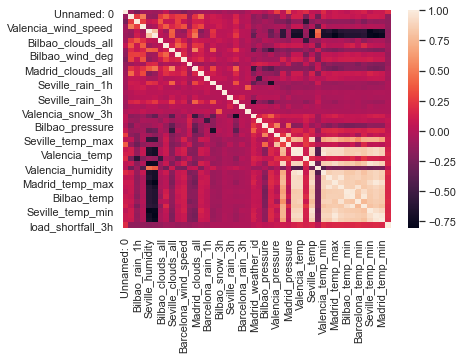

In [19]:
# plot relevant feature interactions
# Correlation heat map
sns.heatmap(df_num.corr())

In [16]:
# evaluate correlation
heatmap_corr=df_num.corr()
heatmap_corr.style.background_gradient(cmap='coolwarm')

NameError: name 'df_num' is not defined

In [21]:
# have a look at feature distributions

In [25]:
df_train['time'] = pd.to_datetime(df_train.time)
df_train['Year'] = df_train[['time']].applymap(lambda df_train:df_train.year
 if not pd.isnull(df_train.year) else 0)
df_train['Month'] = df_train[['time']].applymap(lambda df_train:df_train.month
 if not pd.isnull(df_train.month) else 0)
df_train['Day'] = df_train[['time']].applymap(lambda df_train:df_train.day
 if not pd.isnull(df_train.day) else 0)
df_train.head(1)

time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  \
0 2015-01-01 03:00:00           0.666667           level_5             0.0   

   Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0             0.666667         74.333333             64.0                0.0   

   Bilbao_wind_speed  Seville_clouds_all  ...  Bilbao_temp  \
0                1.0                 0.0  ...   269.338615   

   Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  \
0             281.013       269.338615        274.254667      265.938   

   Madrid_temp_min load_shortfall_3h  Year  Month  Day  
0          265.938       6715.666667  2015      1    1  

[1 rows x 51 columns]

In [26]:
df_test['time'] = pd.to_datetime(df_test.time)
df_test['Year'] = df_test[['time']].applymap(lambda dt_test:dt_test.year
 if not pd.isnull(dt_test.year) else 0)
df_test['Month'] = df_test[['time']].applymap(lambda dt_test:dt_test.month
 if not pd.isnull(dt_test.month) else 0)
df_test['Day'] = df_test[['time']].applymap(lambda dt_test:dt_test.day
 if not pd.isnull(dt_test.day) else 0)
df_test.head(1)

time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  \
0 2018-01-01                5.0           level_8             0.0   

   Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0                  5.0              87.0        71.333333               20.0   

   Bilbao_wind_speed  Seville_clouds_all  ...  Bilbao_temp_min  Bilbao_temp  \
0                3.0                 0.0  ...           276.15       280.38   

   Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  \
0          286.816667           285.15            283.15   279.866667   

  Madrid_temp_min  Year  Month  Day  
0          279.15  2018      1    1  

[1 rows x 50 columns]

In [32]:
cloud =[]
for col in df_num.columns:
    if "cloud" in col:
        cloud.append(col)
df_train[cloud].head(1)

Bilbao_clouds_all  Seville_clouds_all  Madrid_clouds_all
0                0.0                 0.0                0.0

In [51]:
temp= []
for col in df_train.columns:
    if col[-1]=="p" in col:
        temp.append(col)
temp.append("Year")
temp.append("Month")
temp.append("load_shortfall_3h")
for i in cloud:
    temp.append(i)
groupsp= df_train[temp].groupby(["Year", "Month"], as_index= False).mean()
groupsp["total temp"]=( groupsp["Valencia_temp"]+groupsp["Seville_temp"]+groupsp["Barcelona_temp"]+groupsp["Bilbao_temp"]
                     +groupsp["Madrid_temp"])/5
groupsp["total cloud"]= (groupsp["Bilbao_clouds_all"]+groupsp["Seville_clouds_all"]+groupsp["Madrid_clouds_all"])/3
groupsp.tail(1)

Year  Month  Valencia_temp  Seville_temp  Barcelona_temp  Bilbao_temp  \
35  2017     12     283.713895    283.420023      281.514933   280.072594   

    Madrid_temp  load_shortfall_3h  Bilbao_clouds_all  Seville_clouds_all  \
35   278.887647       10041.087366          54.913978           16.775538   

    Madrid_clouds_all  total temp  total cloud  
35          24.333333  281.521818    32.007616

a. Drop redundant features

Feature Bilbao_temp_max and Bilbao_temp_min are dropped as they are direct reflection of the Bilbao_temp.( this applies to all temperature readings from all the regions). Additionally,Unnamed, Madrid_weather_id, Barcelona_weather_id,Seville_weather_id and Bilbao_weather_id are dropped because they doesn’t bring any values to the prediction.


In [10]:
#group= df_train[temp].groupby(["Year", "Month"], as_index= False).mean()
group["Year"]= group["Year"].astype("str")
group["Month"]=group["Month"].astype("str")
group["Ym"]= group["Year"]+ "/"+ group["Month"]
group["Ym"].head()

NameError: name 'group' is not defined

In [53]:
group.head(1)

Year Month  Valencia_temp  Seville_temp  Barcelona_temp  Bilbao_temp  \
0  2015     1     281.831187    281.452116      284.348488   278.151775   

   Madrid_temp  load_shortfall_3h  Bilbao_clouds_all  Seville_clouds_all  \
0   275.065128        9567.351701          52.891156            22.27619   

   Madrid_clouds_all      Ym  
0          22.303401  2015/1

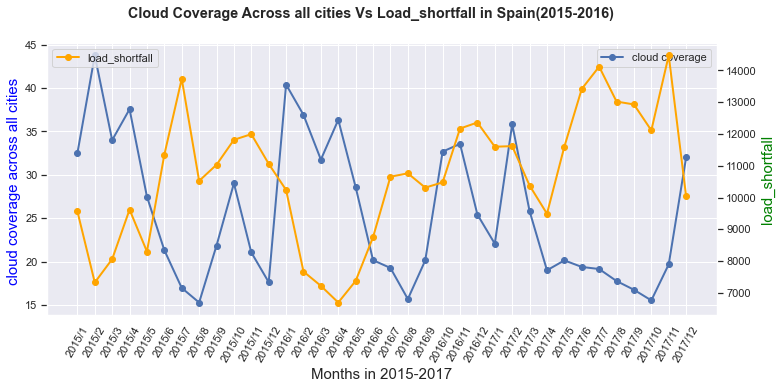

In [55]:
fig, ax = plt.subplots(figsize=[12, 5])

# Plotting the firts line with ax axes
ax.plot(group["Ym"], groupsp['total cloud'] ,
        color='b', linewidth=2, marker='o', label="cloud coverage")
plt.xticks(rotation=60)
ax.set_xlabel('Months in 2015-2017', fontsize=15)
ax.set_ylabel('cloud coverage across all cities ',  color='blue', fontsize=15)
# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()
l=group["load_shortfall_3h"].loc[0:37]
# Now, plot the second line with ax2 axes
ax2.plot([col for col in range(len(l))],
         l,
         color='orange', linewidth=2, marker='o', label="load_shortfall")
ax2.grid()
ax.legend(loc=1)
ax2.legend(loc=9)
fig.suptitle('Cloud Coverage Across all cities Vs Load_shortfall in Spain(2015-2016)', fontweight ="bold")
ax2.set_ylabel('load_shortfall', color="green",fontsize=15)
plt.legend()
plt.show()

In [ ]:
group["Year"]= group["Year"].astype("str")
group["Month"]=group["Month"].astype("str")
group["Ym"]= group["Year"]+ "/"+ group["Month"]
group["Ym"].head(1)

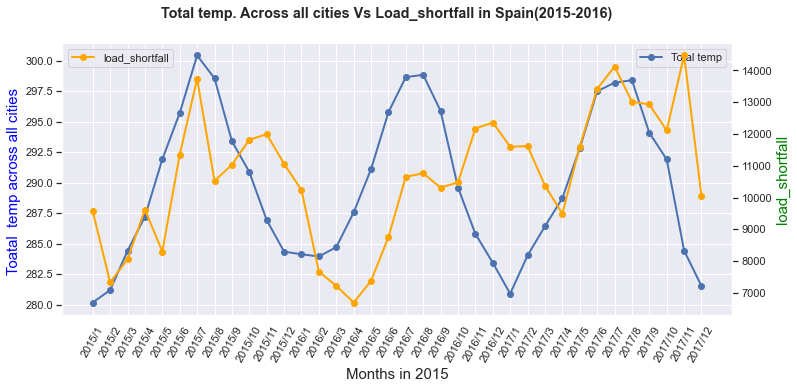

In [56]:
fig, ax = plt.subplots(figsize=[12, 5])

# Plotting the firts line with ax axes
ax.plot(group['Ym'], groupsp["total temp"],
        color='b', linewidth=2, marker='o', label="Total temp")
plt.xticks(rotation=60)
ax.set_xlabel('Months in 2015', fontsize=15)
ax.set_ylabel('Toatal  temp across all cities ',  color='blue', fontsize=15)
# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()

# Now, plot the second line with ax2 axes
ax2.plot(group["Ym"],
         group["load_shortfall_3h"].loc[0:37],
         color='orange', linewidth=2, marker='o', label="load_shortfall")
ax2.grid()
ax.legend(loc=1)
ax2.legend(loc=8)
fig.suptitle('Total temp. Across all cities Vs Load_shortfall in Spain(2015-2016)', fontweight ="bold")
ax2.set_ylabel('load_shortfall', color="green",fontsize=15)
plt.legend()
plt.show()

In [57]:
group["Year"]= group["Year"].astype("str")
group["Month"]=group["Month"].astype("str")
group["Ym"]= group["Year"]+ "/"+ group["Month"]
# group["Ym"].head()
speed= []
for col in df_train.columns:
    if "speed" in col:
        speed.append(col)
speed
speed.append("Year")
speed.append("Month")
speed.append("load_shortfall_3h")
groupsp= df_train[speed].groupby(["Year", "Month"], as_index= False).mean()
groupsp["Avg_Wind_speed"]= (groupsp.drop(columns=["Year","Month", "load_shortfall_3h"])).mean(axis=1)
# group["total temp"]=( group["Valencia_temp"]+group["Seville_temp"]+group["Barcelona_temp"]+group["Bilbao_temp"]+group["Madrid_temp"])/5
# group["total cloud"]= (group["Bilbao_clouds_all"]+group["Seville_clouds_all"]+group["Madrid_clouds_all"])/3
# group.shape

groupsp["Ym"]= group["Ym"]
groupsp.head()

Year  Month  Madrid_wind_speed  Valencia_wind_speed  Bilbao_wind_speed  \
0  2015      1           2.191837             4.776871           1.651701   
1  2015      2           3.614114             5.929429           1.827327   
2  2015      3           2.475806             2.579301           1.090054   
3  2015      4           2.919444             2.290278           1.162500   
4  2015      5           3.263441             2.067204           1.295699   

   Barcelona_wind_speed  Seville_wind_speed  load_shortfall_3h  \
0              2.289796            3.004082        9567.351701   
1              3.033033            3.241742        7327.774775   
2              4.055780            2.393145        8062.243280   
3              2.643056            2.408333        9621.084722   
4              2.981183            2.778226        8300.656586   

   Avg_Wind_speed      Ym  
0        2.782857  2015/1  
1        3.529129  2015/2  
2        2.518817  2015/3  
3        2.284722  2015/4  
4        2.477151  2015/5

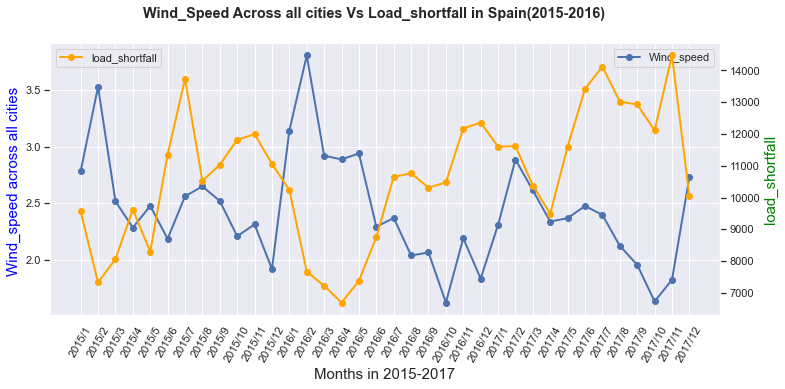

In [58]:
fig, ax = plt.subplots(figsize=[12, 5])

# Plotting the firts line with ax axes
ax.plot(group['Ym'], groupsp["Avg_Wind_speed"].loc[0:37],
        color='b', linewidth=2, marker='o', label="Wind_speed")
plt.xticks(rotation=60)
ax.set_xlabel('Months in 2015-2017', fontsize=15)
ax.set_ylabel('Wind_speed across all cities ',  color='blue', fontsize=15)
# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()

# Now, plot the second line with ax2 axes
ax2.plot(group["Ym"],
         group["load_shortfall_3h"].loc[0:37],
         color='orange', linewidth=2, marker='o', label="load_shortfall")
ax2.grid()
ax.legend(loc=1)
ax2.legend(loc=8)
fig.suptitle('Wind_Speed Across all cities Vs Load_shortfall in Spain(2015-2016)', fontweight ="bold")
ax2.set_ylabel('load_shortfall', color="green",fontsize=15)
plt.legend()
plt.show()

In [59]:

rain= []
for col in df_train.columns:
    if "rain_3h" in col:
        rain.append(col)

rain.append("Year")
rain.append("Month")
rain.append("load_shortfall_3h")
rains= df_train[rain].groupby(["Year", "Month"], as_index= False).mean()
rains["rain_3h"]= (rains.drop(columns=["Year","Month", "load_shortfall_3h"])).mean(axis=1)
rains
# # group["total temp"]=( group["Valencia_temp"]+group["Seville_temp"]+group["Barcelona_temp"]+group["Bilbao_temp"]+group["Madrid_temp"])/5
# # group["total cloud"]= (group["Bilbao_clouds_all"]+group["Seville_clouds_all"]+group["Madrid_clouds_all"])/3
# # group.shape
# #
groupsp["Ym"]= group["Ym"]
groupsp.head()


Year  Month  Madrid_wind_speed  Valencia_wind_speed  Bilbao_wind_speed  \
0  2015      1           2.191837             4.776871           1.651701   
1  2015      2           3.614114             5.929429           1.827327   
2  2015      3           2.475806             2.579301           1.090054   
3  2015      4           2.919444             2.290278           1.162500   
4  2015      5           3.263441             2.067204           1.295699   

   Barcelona_wind_speed  Seville_wind_speed  load_shortfall_3h  \
0              2.289796            3.004082        9567.351701   
1              3.033033            3.241742        7327.774775   
2              4.055780            2.393145        8062.243280   
3              2.643056            2.408333        9621.084722   
4              2.981183            2.778226        8300.656586   

   Avg_Wind_speed      Ym  
0        2.782857  2015/1  
1        3.529129  2015/2  
2        2.518817  2015/3  
3        2.284722  2015/4  
4        2.477151  2015/5

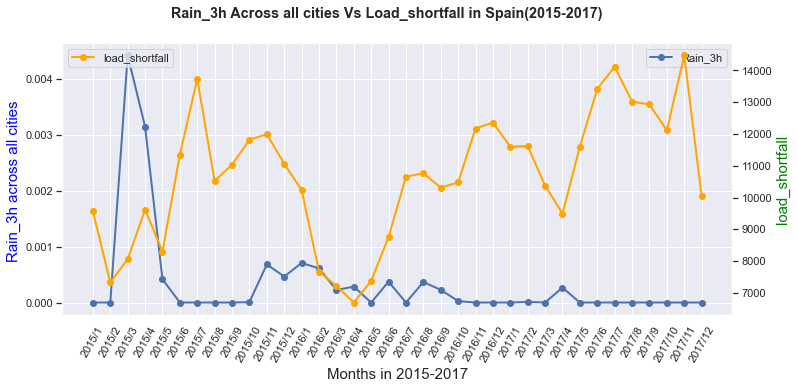

In [60]:
fig, ax = plt.subplots(figsize=[12, 5])

# Plotting the firts line with ax axes
ax.plot(group['Ym'], rains["rain_3h"],
        color='b', linewidth=2, marker='o', label="Rain_3h")
plt.xticks(rotation=60)
ax.set_xlabel('Months in 2015-2017', fontsize=15)
ax.set_ylabel('Rain_3h across all cities ',  color='blue', fontsize=15)
# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()

# Now, plot the second line with ax2 axes
ax2.plot(group["Ym"],
         group["load_shortfall_3h"],
         color='orange', linewidth=2, marker='o', label="load_shortfall")
ax2.grid()
ax.legend(loc=1)
ax2.legend(loc=8)
fig.suptitle('Rain_3h Across all cities Vs Load_shortfall in Spain(2015-2017)', fontweight ="bold")
ax2.set_ylabel('load_shortfall', color="green",fontsize=15)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Total load shortfall per year')

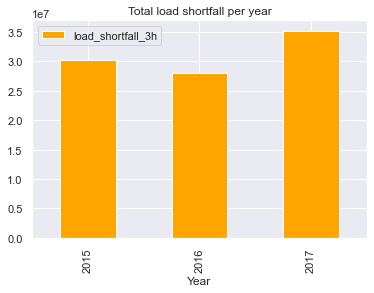

In [62]:
df_train[['Year',
 'load_shortfall_3h']].groupby('Year').sum().plot.bar(color='orange')
plt.title('Total load shortfall per year')

<Figure size 1200x480 with 0 Axes>

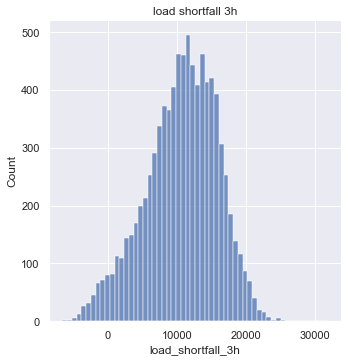

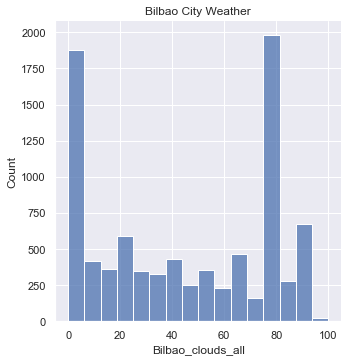

In [64]:
sns.displot(df_train['Bilbao_clouds_all'])
plt.title('Bilbao City Weather')
plt.show()

In [66]:
import plotly.express as px
fig = px.histogram(df_train, 
                   x=df_train['load_shortfall_3h'], 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of 3 hour load shortfall ')
fig.update_layout(bargap=0.90)
fig.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [67]:
# remove missing values/ features
train_df=pd.read_csv("df_train.csv")
train_df = train_df.drop(['Unnamed: 0'], axis=1)
#create a copy 
train_copy_df = train_df.copy(deep = True)
train_copy_df.head()


time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  \
0  2015-01-01 03:00:00           0.666667           level_5             0.0   
1  2015-01-01 06:00:00           0.333333          level_10             0.0   
2  2015-01-01 09:00:00           1.000000           level_9             0.0   
3  2015-01-01 12:00:00           1.000000           level_8             0.0   
4  2015-01-01 15:00:00           1.000000           level_7             0.0   

   Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0             0.666667         74.333333        64.000000                0.0   
1             1.666667         78.333333        64.666667                0.0   
2             1.000000         71.333333        64.333333                0.0   
3             1.000000         65.333333        56.333333                0.0   
4             1.000000         59.000000        57.000000                2.0   

   Bilbao_wind_speed  Seville_clouds_all  ...  Madrid_temp_max  \
0           1.000000                 0.0  ...       265.938000   
1           1.000000                 0.0  ...       266.386667   
2           1.000000                 0.0  ...       272.708667   
3           1.000000                 0.0  ...       281.895219   
4           0.333333                 0.0  ...       280.678437   

   Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  \
0      281.013000       269.338615   269.338615          281.013000   
1      280.561667       270.376000   270.376000          280.561667   
2      281.583667       275.027229   275.027229          281.583667   
3      283.434104       281.135063   281.135063          283.434104   
4      284.213167       282.252063   282.252063          284.213167   

   Bilbao_temp_max Seville_temp_min  Madrid_temp  Madrid_temp_min  \
0       269.338615       274.254667   265.938000       265.938000   
1       270.376000       274.945000   266.386667       266.386667   
2       275.027229       278.792000   272.708667       272.708667   
3       281.135063       285.394000   281.895219       281.895219   
4       282.252063       285.513719   280.678437       280.678437   

   load_shortfall_3h  
0        6715.666667  
1        4171.666667  
2        4274.666667  
3        5075.666667  
4        6620.666667  

[5 rows x 48 columns]

### **a. Dealing with Missing Values**





In [69]:
train_copy_df['Valencia_pressure'].corr(train_copy_df['Madrid_pressure'])

0.7992719089123174

In [71]:
train_copy_df[['Madrid_pressure', 'Valencia_pressure']].describe()

Madrid_pressure  Valencia_pressure
count      8763.000000        6695.000000
mean       1010.316920        1012.051407
std          22.198555           9.506214
min         927.666667         972.666667
25%        1012.333333        1010.333333
50%        1017.333333        1015.000000
75%        1022.000000        1018.000000
max        1038.000000        1021.666667

From the correlation matrix we saw early ,Madrid_pressure and Velencia_pressure are collinear. This gives more reason to replace the missing values in Valencia_pressure column with values from Madrid_pressure

In [72]:
train_copy_df.loc[train_copy_df['Valencia_pressure'].isna(),'Valencia_pressure'] = \
     train_copy_df.loc[train_copy_df['Valencia_pressure'].isna(), 'Madrid_pressure']

train_copy_df['Valencia_pressure'].isna().sum()

0

From the descriptive statistics ,the mean ,min and max value for both features are approximately the same. This give us more reasons to replace the missing values in Valencia_pressure with values from Madrid_pressure column

### **b. Creating New Features**

First,we will be spliting 'time' faeture  to month Day of the week, Year and Hours. These new features will give us more insight since weather vary from month to month in a year.
- Month feature will help us determine the change in energy per season
- The years feature may show a rate of change in energy supplied from renewable & fossil fuel sources.
- Hourly charts shal provide the most relevant hours of the day when load shortfalls occur.

In [74]:

# Extracting year from time column 
train_copy_df['time'] = pd.to_datetime(train_copy_df.time)
train_copy_df['year'] = train_copy_df[['time']].applymap(lambda dt:dt.year
 if not pd.isnull(dt.year) else 0)
train_copy_df['month'] = train_copy_df[['time']].applymap(lambda dt:dt.month
 if not pd.isnull(dt.month) else 0)
train_copy_df['Day'] = train_copy_df[['time']].applymap(lambda dt:dt.day_name()
 if not pd.isnull(dt.day_name()) else 0)
train_copy_df['Hours'] = train_copy_df[['time']].applymap(lambda dt:dt.hour
 if not pd.isnull(dt.day_name()) else 0)
train_copy_df.shape

(8763, 52)

In [75]:
test_df = pd.read_csv("df_test.csv")
test_df.loc[test_df['Valencia_pressure'].isna(),'Valencia_pressure'] = \
     test_df.loc[test_df['Valencia_pressure'].isna(), 'Madrid_pressure']
test_df['time'] = pd.to_datetime(test_df.time)
test_df['year'] = test_df[['time']].applymap(lambda dt:dt.year
 if not pd.isnull(dt.year) else 0)
test_df['month'] = test_df[['time']].applymap(lambda dt:dt.month
 if not pd.isnull(dt.month) else 0)
test_df['Day'] = test_df[['time']].applymap(lambda dt:dt.day_name()
 if not pd.isnull(dt.day_name()) else 0)
test_df['Hours'] = test_df[['time']].applymap(lambda dt:dt.hour
 if not pd.isnull(dt.day_name()) else 0)
test_df.loc[test_df['month'].isin([1,2,3]),['winter','spring','summer','autumn']] = [1,0,0,0]
test_df.loc[test_df['month'].isin([4,5,6]),['winter','spring','summer','autumn']] = [0,1,0,0]
test_df.loc[test_df['month'].isin([7,8,9]),['winter','spring','summer','autumn']] = [0,0,1,0]
test_df.loc[test_df['month'].isin([10,11,12]),['winter','spring','summer','autumn']] = [0,0,0,1]

test_df = test_df.astype(
    {
        'winter': int, 'summer': int, 'spring': int, 'autumn': int
    }
)
test_df.shape
test_df
test_dummies = pd.get_dummies(test_df)
test_dummies.columns = [col.replace(" ","_") for col in test_dummies.columns]

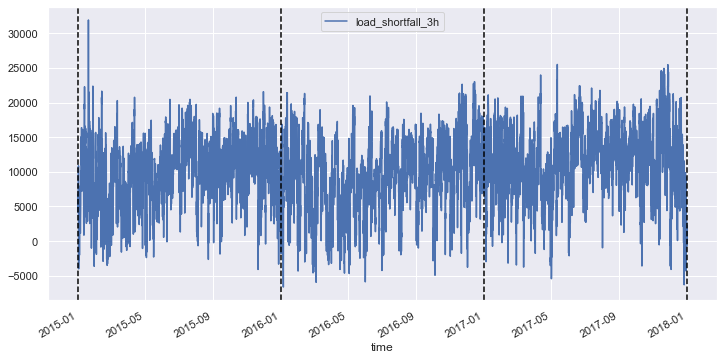

In [76]:
#seasonality
ax = train_copy_df.plot(x='time', y='load_shortfall_3h', figsize=(12,6))
xcoords = ['2015-01-01', '2016-01-01','2017-01-01', '2018-01-01']
for dt in xcoords:
    plt.axvline(x=dt, color='black', linestyle='--')

A keen eye might already see from this plot that the 3 hour load shortfall seem to dip around the new year and peak a few months before. Let’s dive a little further into this by plotting a vertical line for January of every year.

In [77]:
#Let us Create new season features 
# Between Jan-March=Winter
# Between April-June=Spring
# Between July-Sept=Summer
# Between Oct-Dec=Autumn

train_copy_df.loc[train_copy_df['month'].isin([1,2,3]),['winter','spring','summer','autumn']] = [1,0,0,0]
train_copy_df.loc[train_copy_df['month'].isin([4,5,6]),['winter','spring','summer','autumn']] = [0,1,0,0]
train_copy_df.loc[train_copy_df['month'].isin([7,8,9]),['winter','spring','summer','autumn']] = [0,0,1,0]
train_copy_df.loc[train_copy_df['month'].isin([10,11,12]),['winter','spring','summer','autumn']] = [0,0,0,1]

train_copy_df = train_copy_df.astype(
    {
        'winter': int, 'summer': int, 'spring': int, 'autumn': int
    }
)



C:\Users\Joe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Day', ylabel='load_shortfall_3h'>

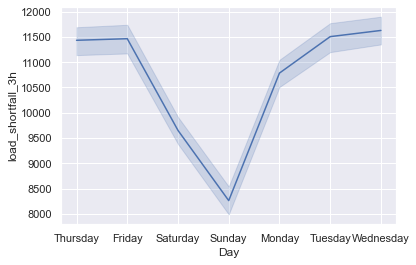

In [78]:
#Next, let’s group the 3 hour load shortfall time series by day of the week, to explore weekly seasonality.
sns.lineplot(train_copy_df['Day'], train_copy_df['load_shortfall_3h'])

Load_shortfall_3h is significantly higher on weekdays than on weekends. The low outliers on weekdays are presumably during holidays.

### **c. Encoding categorical features**

we are going to use  one-hot encoding on the categorical features  to generate their dummy variables.


In [79]:
dummies_df = pd.get_dummies(train_copy_df[['Valencia_wind_deg','Seville_pressure']], drop_first = True)
train_copy_df = pd.concat([train_copy_df, dummies_df], axis='columns')
train_copy_df = train_copy_df.drop(['Valencia_wind_deg', 'Seville_pressure' ], axis='columns')



In [80]:
train_copy_df.columns = [col.replace(" ","_") for col in train_copy_df.columns] 
train_copy_df.shape

(8763, 87)

In [81]:
column_titles = [col for col in train_copy_df.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
train_copy_df = train_copy_df.reindex(columns = column_titles)
train_copy_df.head()

time  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
0 2015-01-01 03:00:00           0.666667             0.0             0.666667   
1 2015-01-01 06:00:00           0.333333             0.0             1.666667   
2 2015-01-01 09:00:00           1.000000             0.0             1.000000   
3 2015-01-01 12:00:00           1.000000             0.0             1.000000   
4 2015-01-01 15:00:00           1.000000             0.0             1.000000   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0         74.333333        64.000000                0.0           1.000000   
1         78.333333        64.666667                0.0           1.000000   
2         71.333333        64.333333                0.0           1.000000   
3         65.333333        56.333333                0.0           1.000000   
4         59.000000        57.000000                2.0           0.333333   

   Seville_clouds_all  Bilbao_wind_deg  ...  Seville_pressure_sp24  \
0                 0.0       223.333333  ...                      0   
1                 0.0       221.000000  ...                      0   
2                 0.0       214.333333  ...                      0   
3                 0.0       199.666667  ...                      0   
4                 0.0       185.000000  ...                      0   

   Seville_pressure_sp25  Seville_pressure_sp3  Seville_pressure_sp4  \
0                      1                     0                     0   
1                      1                     0                     0   
2                      1                     0                     0   
3                      1                     0                     0   
4                      1                     0                     0   

   Seville_pressure_sp5  Seville_pressure_sp6  Seville_pressure_sp7  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Seville_pressure_sp8  Seville_pressure_sp9  load_shortfall_3h  
0                     0                     0        6715.666667  
1                     0                     0        4171.666667  
2                     0                     0        4274.666667  
3                     0                     0        5075.666667  
4                     0                     0        6620.666667  

[5 rows x 87 columns]

### d.Feature Selection

- **SelectKBest Model**

In [ ]:
train_copy_df = train_copy_df.drop(['time','Day'], axis='columns')

In [85]:
# Create x, y variable DFs
def create_x_y_features(train_copy_df = train_copy_df):
    train_df = train_copy_df.copy(deep = True)
    Y_var = train_df['load_shortfall_3h']
    X_var = train_df[[i for i in train_df if i not in 'load_shortfall_3h']]

    return train_df, Y_var , X_var


In the below function, we are using the SelectKBest library to helps determine the best 60 features in our data.
The method considers the features based their F-scores result.

In [86]:
def select_k_best(data_df):
    data_df, Y_var, X_var = create_x_y_features(data_df)
    X_train, X_test, y_train, y_test = train_test_split(X_var,
                                                        Y_var,
                                                        test_size= 0.2,
                                                        random_state=42)

    k_best = SelectKBest(score_func= f_regression, k = 60)

    k_best.fit(X_train, y_train)

    X_train_fs, X_test_fs = k_best.transform(X_train), k_best.transform(X_test)
    sns.lineplot([i for i in range(len(k_best.scores_))], k_best.scores_)
    plt.show()
    
    return k_best, X_train_fs, X_test_fs

C:\Users\Joe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



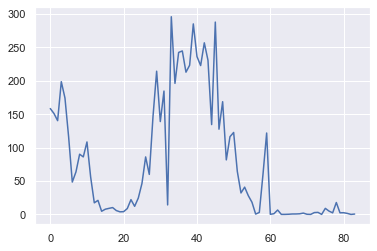

In [87]:
k_best,_,_= select_k_best(train_copy_df)

In [88]:
filter = k_best.get_support()
features = np.array([i for i in train_copy_df.columns if i not in 'load_shortfall_3h'])
 
print("All features before selection:")
print(features)
 
print("The Best 60 selected features are::")
print(features[filter])
print(k_best)

All features before selection:
['Madrid_wind_speed' 'Bilbao_rain_1h' 'Valencia_wind_speed'
 'Seville_humidity' 'Madrid_humidity' 'Bilbao_clouds_all'
 'Bilbao_wind_speed' 'Seville_clouds_all' 'Bilbao_wind_deg'
 'Barcelona_wind_speed' 'Barcelona_wind_deg' 'Madrid_clouds_all'
 'Seville_wind_speed' 'Barcelona_rain_1h' 'Seville_rain_1h'
 'Bilbao_snow_3h' 'Barcelona_pressure' 'Seville_rain_3h' 'Madrid_rain_1h'
 'Barcelona_rain_3h' 'Valencia_snow_3h' 'Madrid_weather_id'
 'Barcelona_weather_id' 'Bilbao_pressure' 'Seville_weather_id'
 'Valencia_pressure' 'Seville_temp_max' 'Madrid_pressure'
 'Valencia_temp_max' 'Valencia_temp' 'Bilbao_weather_id' 'Seville_temp'
 'Valencia_humidity' 'Valencia_temp_min' 'Barcelona_temp_max'
 'Madrid_temp_max' 'Barcelona_temp' 'Bilbao_temp_min' 'Bilbao_temp'
 'Barcelona_temp_min' 'Bilbao_temp_max' 'Seville_temp_min' 'Madrid_temp'
 'Madrid_temp_min' 'year' 'month' 'Hours' 'winter' 'spring' 'summer'
 'autumn' 'Valencia_wind_deg_level_10' 'Valencia_wind_deg_level_2'


In [89]:
kbest = features[filter]
X = train_copy_df[kbest]
Y = train_copy_df['load_shortfall_3h']
test = test_dummies[kbest]

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In this section we are going to compare the perfomace of the following three models 

1. Ordinary Linear Regression
2. Decision Trees
3. Random Forest

## 1. Ordinary Least Squares Linear Regression model

First,we will use the below function to separate our data set into features and  lables

We will then proceed to define the string fomular for our model which we will proceed to fit on the variables that have been selected with the help of below function:

In [91]:
# Creating train and test sets
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.2, random_state = 1)

from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
#dfm = df_dummies.copy()

# The dependent variable:
y_name = 'load_shortfall_3h'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in X.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 load_shortfall_3h ~ Madrid_wind_speed + Bilbao_rain_1h + Valencia_wind_speed + Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Bilbao_wind_speed + Seville_clouds_all + Bilbao_wind_deg + Barcelona_wind_speed + Barcelona_wind_deg + Madrid_clouds_all + Seville_wind_speed + Barcelona_rain_1h + Seville_rain_1h + Bilbao_snow_3h + Barcelona_pressure + Seville_rain_3h + Madrid_rain_1h + Madrid_weather_id + Barcelona_weather_id + Bilbao_pressure + Seville_weather_id + Valencia_pressure + Seville_temp_max + Madrid_pressure + Valencia_temp_max + Valencia_temp + Bilbao_weather_id + Seville_temp + Valencia_humidity + Valencia_temp_min + Barcelona_temp_max + Madrid_temp_max + Barcelona_temp + Bilbao_temp_min + Bilbao_temp + Barcelona_temp_min + Bilbao_temp_max + Seville_temp_min + Madrid_temp + Madrid_temp_min + year + month + Hours + winter + spring + summer + autumn + Valencia_wind_deg_level_10 + Valencia_wind_deg_level_2 + Valencia_wind_deg_level_3 + Valencia_wind_deg_level_4 

In [92]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=train_copy_df)
fitted = model.fit()
Y_pred1 = fitted.predict(test)
# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     32.96
Date:                Fri, 27 May 2022   Prob (F-statistic):               0.00
Time:                        17:15:13   Log-Likelihood:                -86560.
No. Observations:                8763   AIC:                         1.732e+05
Df Residuals:                    8703   BIC:                         1.737e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [93]:
Resultsdict1 = {'time': test_df['time'],
         'load_shortfall_3h': Y_pred1}
pred_df1 = pd.DataFrame(data = Resultsdict1)
pred_df1
pred_df1.to_csv("C:/Users/Joe/Downloads/Explore Academy/Regression/Predict/Advanced-Regression-Starter-Data/Team_ES5_ols.csv", index=False)

## 2.**Deciscion trees regression model**

In [94]:
regr_tree = DecisionTreeRegressor(random_state=42)
regr_tree.fit(X, Y)
Y_pred2 = regr_tree.predict(test)

In [95]:
Resultsdict2 = {'time': test_df['time'],
         'load_shortfall_3h': Y_pred2}
pred_df2 = pd.DataFrame(data = Resultsdict2)
pred_df2
pred_df2.to_csv("C:/Users/Joe/Downloads/Explore Academy/Regression/Predict/Advanced-Regression-Starter-Data/Team_ES5_dtr.csv", index=False)

## 3.**Random Forest Regression Model**

In [96]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)

10

In [ ]:
# create one or more ML models
estimators = [50, 100, 200, 250, 300, 400]

def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

for count in estimators:
    score = cross_val_score(ensemble.RandomForestRegressor(n_estimators= count, random_state= 42), X, Y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For estimators: {count}')
    rmse(score.mean())

In [ ]:
cls=RandomForestRegressor(random_state= 42)
parameter_grid = {
    'max_depth': [10,20,30,40,50,60],
    'n_estimators' : [250]
}
grid_search = GridSearchCV(estimator = cls, cv = kf, param_grid = parameter_grid)

grid_search.fit(X,Y)
grid_search.best_params_


In [ ]:
Resultsdict = {'time': test_df['time'],
         'load_shortfall_3h': Y_pred}
pred_df = pd.DataFrame(data = Resultsdict)
pred_df
pred_df.to_csv("C:/Users/Joe/Downloads/Explore Academy/Regression/Predict/Advanced-Regression-Starter-Data/Team_ES5.csv", index=False)

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic